# How to fit a CLB loop to your paired sunpy maps

This notebook will help you create and / or modify a CLB parameter file. If you need a pair of cropped AIA / STEREO images for fitting, please see [eg_aia_stereo_pair.ipynb](eg_aia_stereo_pair.ipynb).

First, we prepare our necessary imports.

In [1]:
import sunpy.map
from CoronalLoopBuilder.builder import CoronalLoopBuilder # type: ignore
import astropy.units as u

import matplotlib.pyplot as plt

Also, let's adjust our settings for this run. 

- Set **update_with_dummy** to `True` if this is the first time you are running this script, and there is no loop parameter file matching **LOOP_DIR + LOOP_FNAME** that you wish to preserve. 
- Change **CROPPED_DIR** to the location of your cropped AIA and STEREO maps, and change **AIA_IMG** and **STEREO_IMG** to their filenames.
- **LOOP_DIR** is the default save location for Coronal Loop Builder parameters. Change **LOOP_FNAME** for a different parameter file name.
    - *Careful! Choose **LOOP_FNAME** so as to not overwrite a previous loop file!*

In [2]:
update_with_dummy = False

CROPPED_DIR = './observations_cropped/'
AIA_IMG = '195_AIA_2013-05-15T04:40:08.80.fits'
STEREO_IMG = '195_STEREO_2013-05-15T04:40:58.913.fits'

LOOP_DIR = './loop_params/'
LOOP_FNAME = 'aia_stereo_loop_195.pkl'

Let's load our cropped AIA and STEREO maps from the paths above.

In [3]:
aia_map = sunpy.map.Map(CROPPED_DIR + AIA_IMG)
stereo_map = sunpy.map.Map(CROPPED_DIR + STEREO_IMG)

First, observe your selected and preprocessed maps to ensure the correct ones were chosen.

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


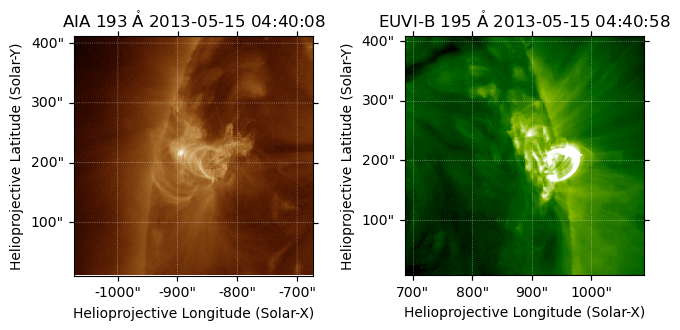

In [4]:
%matplotlib inline

# Create figure with subplots
fig = plt.figure()
subfigs = fig.subfigures(1, 2, wspace=0.07)

ax1 = subfigs[0].add_subplot(projection=aia_map)
aia_map.plot(axes=ax1)

ax2 = subfigs[1].add_subplot(projection=stereo_map)
stereo_map.plot(axes=ax2)

plt.show()

At this point, we don't have a set of loop parameters to work with. Let's generate a dummy loop based on the coordinates of the center of the aia map.

In [5]:
frameHGS = sunpy.coordinates.frames.HeliographicStonyhurst()
cencoord = aia_map.center.transform_to(frameHGS)

dummy_lat = cencoord.lat.value
dummy_lon = cencoord.lon.value

dummy_params = {
        "majax": 0 * u.Mm,
        "minax": 0 * u.Mm,
        "radius": 30 * u.Mm,
        "height": 10 * u.Mm,
        "phi0": dummy_lon * u.deg,
        "theta0": dummy_lat * u.deg,
        "el": 90.0 * u.deg,
        "az": 0 * u.deg,
        "samples_num": 100
    }

dummy_lat, dummy_lon

(11.996749568052106, -69.93820670555198)

Now, let's align the Coronal Loop Builder loop to the image pair. Use the sliders that appear in the interactive window to adjust the location and size of the CLB loop. 

- Adjust the `HGLT` (Heliographic Latitude) and `HGLN` (Heliographic Longitude) sliders to locate the solar coordinates of the centermost observable loop of the arcade
- Adjust the `azimuth` slider to change the rotation of the loop relative to the center vertical, so that the footpoints of the loop align with the observable flare ribbon
- Adjust the `radius` and `height` sliders to match the size and position of the more head-on view of the arcade
- Adjust `elevation` to change the angle of the loop plane relative to the solar surface
- Adjust `Samples num` to change the resolution of your loop

In [6]:
%matplotlib qt5

# Create figure with subplots
fig = plt.figure()
subfigs = fig.subfigures(1, 2, wspace=0.3)

# Plot AIA map in the first subplot
ax1 = subfigs[0].add_subplot(projection=aia_map)
aia_map.plot(axes=ax1)
aia_map.draw_limb(axes=ax1)

# Plot SDO map in the second subplot
ax2 = subfigs[1].add_subplot(projection=stereo_map)
stereo_map.plot(axes=ax2)
aia_map.draw_limb(axes=ax2)

# Adjust layout
plt.tight_layout()

# Overplot CLB loops
coronal_loop1 = CoronalLoopBuilder(fig, [ax1, ax2], [aia_map, stereo_map], ellipse=False, **dummy_params, color='r')

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in ""


Loop length: 114.23973285781067 Mm


Save your adjusted CLB loop to a `.pkl` file in your local `loop_params` folder.

In [7]:
if update_with_dummy:
    coronal_loop1.save_params_to_pickle(LOOP_FNAME)

To fine-tune your CLB loop, alternate between executing the following two cells, first to update the parameters, and second to save your changes.

In [7]:
# Create figure with subplots
fig = plt.figure()
subfigs = fig.subfigures(1, 2, wspace=0.3)

# Plot AIA map in the first subplot
ax1 = subfigs[0].add_subplot(projection=aia_map)
aia_map.plot(axes=ax1)
aia_map.draw_limb(axes=ax1)

# Plot SDO map in the second subplot
ax2 = subfigs[1].add_subplot(projection=stereo_map)
stereo_map.plot(axes=ax2)
aia_map.draw_limb(axes=ax2)

# Adjust layout
plt.tight_layout()

# Overplot CLB loops
coronal_loop1 = CoronalLoopBuilder(fig, [ax1, ax2], [aia_map, stereo_map], ellipse=False, pkl=LOOP_DIR + LOOP_FNAME, color='r')


Loop dimensions loaded:{'radius': <Quantity 22.1345 Mm>, 'height': <Quantity 10. Mm>, 'phi0': <Quantity 297.36 deg>, 'theta0': <Quantity 10.8 deg>, 'el': <Quantity 90. deg>, 'az': <Quantity 0. deg>, 'samples_num': 100}
Loop length: 89.90717749124303 Mm


In [9]:
coronal_loop1.save_params_to_pickle(LOOP_FNAME)

Loop dimensions saved to './loop_params/aia_stereo_loop_195.pkl'!


Now that you have created a clb loop, you can apply it when [aligning a synthetic projection](eg_synth_proj.ipynb).